## Autoencoder
An autoencoder is not used for *supervised learning*. We will
no longer try to *predict* something about our input.
Instead, an autoencoder is considered a **generative model**:
it learns a distributed *representation* of our training data,
and can even be used to generate new instances of the training data.

An autoencoder model contains two components:

- An **encoder** that takes an image as input, and 
  outputs a low-dimensional embedding (representation)
  of the image.
- A **decoder** that takes the low-dimensional embedding,
  and reconstructs the image.

An autoencoder is typically shown like below: 

In [1]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# define the autoencoder architecture
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # encoder
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32)
        )
        # decoder
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid()  # output values between 0 and 1
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# define the rnn architecture
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)  # initial hidden state
        out, _ = self.rnn(x, h0)  # RNN output and hidden state
        out = self.fc(out[:, -1, :])  # take the last time step's output
        return out

# define the transformer architecture
class Transformer(nn.Module):
    def __init__(self, input_size, num_heads, num_layers, output_size):
        super(Transformer, self).__init__()
        self.transformer_layer = nn.TransformerEncoderLayer(d_model=input_size, nhead=num_heads)
        self.transformer = nn.TransformerEncoder(self.transformer_layer, num_layers=num_layers)
        self.fc = nn.Linear(input_size, output_size)

    def forward(self, x):
        x = x.permute(1, 0, 2)  # reshape for transformer (seq_len, batch_size, input_size)
        transformer_out = self.transformer(x)
        transformer_out = transformer_out.permute(1, 0, 2)  # reshape back (batch_size, seq_len, input_size)
        out = self.fc(transformer_out[:, -1, :])  # take the last time step's output
        return out


In [2]:
# dataset preparation 

mnist_data = datasets.MNIST('data', train=True, download=True, transform=transforms.ToTensor())
mnist_data = list(mnist_data)[:4096]  # convert to list for easier indexing

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

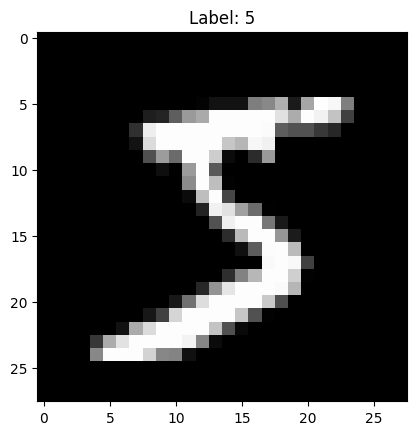

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

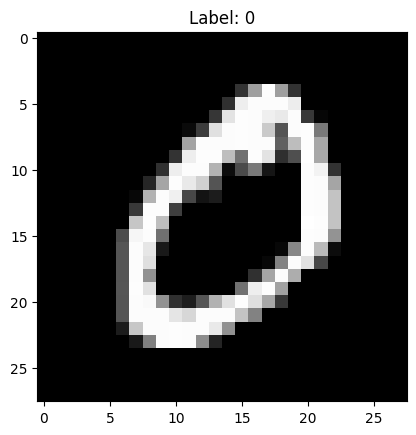

In [3]:
for _,(img, labels) in enumerate(mnist_data[:2]):
    print(img , labels)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f'Label: {labels}')
    plt.show()

In [4]:
# create Autoencoder 

class SimpleAutoencoder(nn.Module):
    def __init__(self):
        super(SimpleAutoencoder, self).__init__()
        
        encoding_dim = 32

        # encoder
        self.fc1 = nn.Linear(28*28, encoding_dim)
        # decoder
        self.fc2 = nn.Linear(encoding_dim, 28*28)

    def forward(self, x):
        # flatten the input
        x = x.view(x.size(0), -1)   # reshape to (batch_size, 28*28) good for batch processing

        # flattened = img.view(-1,28*28)  # reshape to (1, 28*28) for single image
        
        # encode
        encoded = F.relu(self.fc1(x))
        # decode
        decoded = torch.sigmoid(self.fc2(encoded))
        return decoded

#### Training an Autoencoder

How do we train an autoencoder? How do we know what
kind of "encoder" and "decoder" we want?

One observation is that if we pass an image through the encoder,
then pass the result through the decoder, we should get
roughly the same image back. Ideally, reducing the 
dimensionality and then generating the image should
give us the same result.

This observation provides us a training strategy: we will
minimize the reconstruction error of the autoencoder
across our training data.
We use a loss function called 'MSELoss', which
computes the square error at every pixel.

Beyond using a different loss function, the training 
scheme is roughly the same. Note that in the code below,
we are using a the optimizer called 'Adam'.

We switched to this optimizer not because it is specifically
used for autoencoders, but because this is the optimizer that
people tend to use in practice. Feel free to use Adam for your
other neural networks.

In [5]:
def train(model, num_epochs = 20, batch_size = 64, lr = 1e-3):

    torch.manual_seed(42)  # for reproducibility

    criterion = nn.MSELoss()  # mean squared error loss
    optimizer = optim.Adam(model.parameters(), lr=lr , weight_decay=1e-5)  # Adam optimizer with weight decay for regularization

    train_loader = torch.utils.data.DataLoader(mnist_data, batch_size=batch_size, shuffle=True)

    outputs = []

    for epoch in range(num_epochs):
        for data in train_loader:
            img, _ = data  # we only need the images, not the labels
            recon = model(img) # forward pass
            img = img.view(-1, 28*28)  # flatten the input for loss calculation
            loss = criterion(recon, img) # calculate the loss
            loss.backward()  # backpropagation
            optimizer.step()  # update the weights
            optimizer.zero_grad()  # zero the gradients for the next iteration

        print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}')
        outputs.append((epoch, img, recon))
    return outputs



In [6]:
model = SimpleAutoencoder()
max_epochs = 20
outputs = train(model, num_epochs=max_epochs)

Epoch:1, Loss:0.0688
Epoch:2, Loss:0.0607
Epoch:3, Loss:0.0492
Epoch:4, Loss:0.0465
Epoch:5, Loss:0.0430
Epoch:6, Loss:0.0371
Epoch:7, Loss:0.0390
Epoch:8, Loss:0.0357
Epoch:9, Loss:0.0345
Epoch:10, Loss:0.0316
Epoch:11, Loss:0.0266
Epoch:12, Loss:0.0292
Epoch:13, Loss:0.0323
Epoch:14, Loss:0.0272
Epoch:15, Loss:0.0250
Epoch:16, Loss:0.0245
Epoch:17, Loss:0.0237
Epoch:18, Loss:0.0230
Epoch:19, Loss:0.0231
Epoch:20, Loss:0.0222


In [7]:
outputs[19]

(19,
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([[1.6986e-03, 2.4654e-03, 1.4717e-03,  ..., 1.2813e-03, 1.1649e-03,
          7.0275e-04],
         [6.0333e-03, 8.6556e-03, 4.7809e-03,  ..., 5.7212e-03, 4.2800e-03,
          7.5221e-04],
         [1.8045e-04, 1.6395e-04, 2.4718e-05,  ..., 1.6598e-04, 1.0344e-04,
          6.2408e-05],
         ...,
         [1.1045e-04, 1.6595e-04, 3.9940e-05,  ..., 1.7418e-04, 1.6279e-04,
          1.0035e-03],
         [3.4068e-03, 1.5872e-03, 3.7189e-03,  ..., 3.4153e-03, 1.8841e-03,
          1.0472e-03],
         [2.7659e-04, 7.0773e-05, 3.1997e-04,  ..., 5.9474e-04, 2.8136e-04,
          6.1892e-05]], grad_fn=<SigmoidBackward0>))

In [8]:
img = outputs[19][1].shape
recon = outputs[19][2].shape

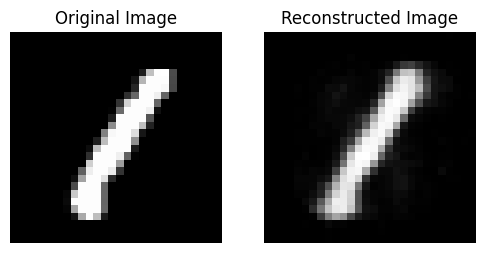

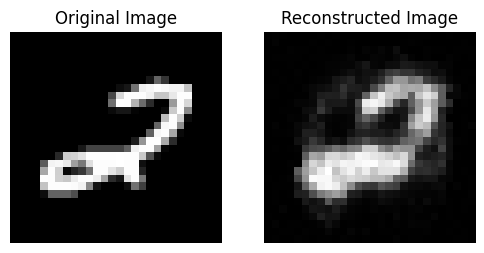

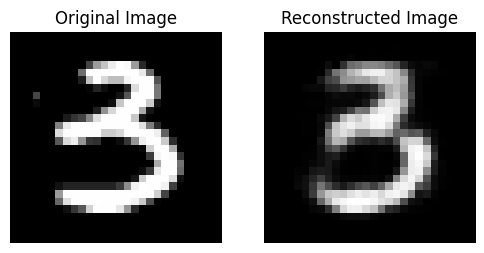

In [9]:
for iteration,(img, recon) in enumerate(zip(outputs[19][1], outputs[19][2])):
    
    if iteration < 3:  # display only the first 5 images

        img = img.view(28, 28).detach().numpy()  # reshape and convert to numpy for plotting
        recon = recon.view(28, 28).detach().numpy()  # reshape and convert to numpy for plotting

        plt.figure(figsize=(6, 3))
        plt.subplot(1, 2, 1)
        plt.imshow(img, cmap='gray')
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(recon, cmap='gray')
        plt.title('Reconstructed Image')
        plt.axis('off')

        plt.show()
    else:
        break



## Convolutional Autoencoder 

when dealing with the image it is better to use the convolutional neutral network and take advantage of the spatial relationships.

but the tricky part is doing the deconvolutional layer in the decoding section

when we need to do something that is similar to the convolutional layer but that goes in the opposite direction. We will use something called a transpose convlution transpose convolution.

It is inverse of the convlution operation. 

In [10]:
# Convolution Transpose

conv = nn.Conv2d(in_channels = 8,
                 out_channels = 8,
                 kernel_size = 5)

x = torch.randn(2,8,64,64) # batch size of 2, 8 channels, 64x64 image size
y = conv(x)

print(y.shape)


torch.Size([2, 8, 60, 60])


In [11]:
# deconvlution layer 

convt = nn.ConvTranspose2d(in_channels = 8,
                           out_channels = 8,
                            kernel_size = 5)

convt(y).shape



torch.Size([2, 8, 64, 64])

what it does above is convert the conv layer from [2,8,64,64] -> [2,8,60,60]

then the inverse convultion layer from [2,8,60,60] -> [2,8,64,64]

However, it will require the further training to learn to act as an approximate inverse to **conv**

In [12]:
x = torch.randn(32,8,64,64) # batch size of 2, 8 channels, 64x64 image size
y = convt(x)

y.shape

torch.Size([32, 8, 68, 68])

In [13]:
conv = nn.Conv2d(in_channels = 8,
                 out_channels = 8,
                    kernel_size = 5)

# 64 - 5 + 2*0 + 1 = 60 # (input_size - kernel_size + 2*padding) / stride + 1
y = torch.randn(32,8,64,64) # batch size of 2, 8 channels, 64x64 image size
x = conv(y)
x.shape

torch.Size([32, 8, 60, 60])

In [14]:
# as before, we can add a padding to our convolution layer to maintain the same spatial dimensions

convt = nn.ConvTranspose2d(in_channels = 8,
                           out_channels = 8,
                            kernel_size = 5,
                            padding = 2)

x = torch.randn(32,8,64,64) # batch size of 2, 8 channels, 64x64 image size
y = convt(x)
y.shape

torch.Size([32, 8, 64, 64])

In [15]:
# use of stride to increase the spatial dimensions

convt = nn.ConvTranspose2d(in_channels = 8,
                            out_channels = 8,
                             kernel_size = 5,
                             stride = 2,
                             output_padding = 1) # output_padding is used to ensure the output size is correct when stride > 1
                                                # it is to match the specific target shape
x = torch.randn(32,8,64,64) # batch size of 2, 8 channels, 64x64 image size
y = convt(x)
y.shape


torch.Size([32, 8, 132, 132])

In [16]:
class AutoEncoderCNN(nn.Module):
    def __init__(self):
        super(AutoEncoderCNN, self).__init__()
        
        # encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),  # (batch_size, 16, 14, 14)
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1), # (batch_size, 32, 7, 7)
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=7), # (batch_size, 64, 1, 1)
            nn.ReLU()
        )
        
        # decoder   
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, kernel_size=7), # (batch_size, 32, 7, 7)
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, kernel_size=3, stride=2, padding=1, output_padding=1), # (batch_size, 16, 14, 14)
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, kernel_size=3, stride=2, padding=1, output_padding=1), # (batch_size, 1, 28, 28)
            nn.Sigmoid() # output values between 0 and 1
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [17]:
# encoder
nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1)
nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1)
nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1)

# decoder
nn.ConvTranspose2d(64, 32, kernel_size=7) # (batch_size, 32, 7, 7)
nn.ConvTranspose2d(32, 16, kernel_size=3, stride=2, padding=1, output_padding=1) # (batch_size, 16, 14, 14)
nn.ConvTranspose2d(16, 1, kernel_size=3, stride=2, padding=1, output_padding=1) # (batch_size, 1, 28, 28)


ConvTranspose2d(16, 1, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))

In [18]:
# Training a convolutional autoencoder would follow a similar process to the fully connected one, 
# but you would need to ensure that your input data is in the correct shape (batch_size, channels, height, width)
#  and that your loss function and optimizer are set up to handle the convolutional architecture.

def train(model, num_epochs = 5, batch_size = 64, lr = 1e-3):

    torch.manual_seed(42)  # for reproducibility

    criterion = nn.MSELoss() # mean squared error loss
    optimizer = optim.Adam(model.parameters(), lr=lr , weight_decay=1e-5)  # Adam optimizer with weight decay for regularization

    train_loader = torch.utils.data.DataLoader(mnist_data, batch_size=batch_size, shuffle=True)

    outputs = []

    for epoch in range(num_epochs):
        for data in train_loader:
            img, _ = data  # we only need the images, not the labels
            recon = model(img) # forward pass

            loss = criterion(recon, img) # calculate the loss
            loss.backward()  # backpropagation
            optimizer.step()  # update the weights
            optimizer.zero_grad()  # zero the gradients for the next iteration

        print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}')
        outputs.append((epoch, img, recon))
    return outputs




In [19]:
model = AutoEncoderCNN()
max_epochs = 20
model(mnist_data[0][0].unsqueeze(0)).shape  # test the model with a single image

torch.Size([1, 1, 28, 28])

In [20]:
outputs = train(model, num_epochs=max_epochs) # better than the ANN autoencoder


Epoch:1, Loss:0.0674
Epoch:2, Loss:0.0595
Epoch:3, Loss:0.0421
Epoch:4, Loss:0.0340
Epoch:5, Loss:0.0280
Epoch:6, Loss:0.0224
Epoch:7, Loss:0.0206
Epoch:8, Loss:0.0197
Epoch:9, Loss:0.0187
Epoch:10, Loss:0.0148
Epoch:11, Loss:0.0123
Epoch:12, Loss:0.0126
Epoch:13, Loss:0.0146
Epoch:14, Loss:0.0114
Epoch:15, Loss:0.0111
Epoch:16, Loss:0.0108
Epoch:17, Loss:0.0102
Epoch:18, Loss:0.0094
Epoch:19, Loss:0.0092
Epoch:20, Loss:0.0091


In [21]:
import numpy as np
np.array(outputs[19][1].shape)  # original images shape

array([64,  1, 28, 28])

## look into the training progression

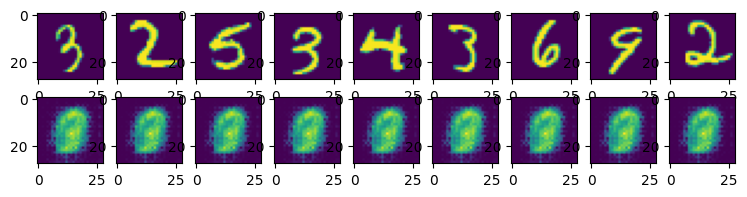

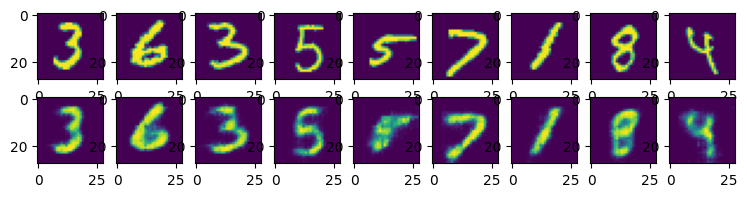

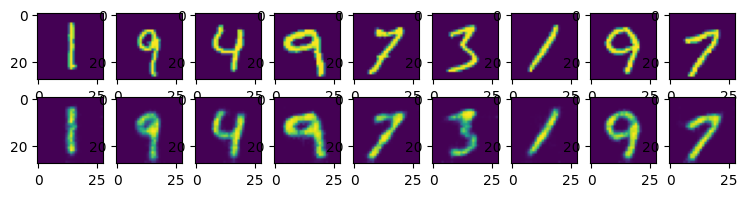

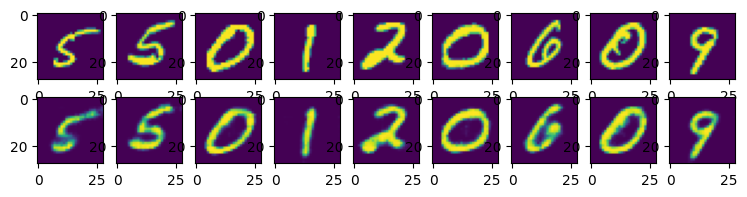

In [22]:
for k in range(0, max_epochs, 5):
    plt.figure(figsize = (9,2))

    imgs = outputs[k][1].detach().numpy()  # get the original images from the outputs
    recon = outputs[k][2].detach().numpy()  # get the reconstructed images from the outputs

    for i, item in enumerate(imgs):

        if i >=9: break

        plt.subplot(2, 9, i+1)
        plt.imshow(item[0])

    for i, item in enumerate(recon):
        if i >=9: break

        plt.subplot(2, 9, i+10)
        plt.imshow(item[0])
    
    

In [23]:
# We can add noise to our data and see if we can train an autoencoder to clean out the noise added to our images


def train(model, num_epochs = 20, batch_size = 64, lr = 1e-3):

    torch.manual_seed(42)  # for reproducibility

    criterion = nn.MSELoss() # mean squared error loss
    optimizer = optim.Adam(model.parameters(), lr=lr , weight_decay=1e-5)  # Adam optimizer with weight decay for regularization

    train_loader = torch.utils.data.DataLoader(mnist_data, batch_size=batch_size, shuffle=True)


    outputs = []

    # add noise
    noise = 0.5  # adjust the noise level as needed

    for epoch in range(num_epochs):
        for data in train_loader:
            img, _ = data  # we only need the images, not the labels
            
            # add noise to the input images
            img_noisy = img + noise * torch.randn(*img.shape)  # add Gaussian noise
            img_noisy = torch.clamp(img_noisy, 0., 1.)  # ensure the noisy images are still in the valid range [0, 1]
            
            
            recon = model(img_noisy) # forward pass with noisy images

            loss = criterion(recon, img) # calculate the loss against the original clean images
            loss.backward()  # backpropagation
            optimizer.step()  # update the weights
            optimizer.zero_grad()  # zero the gradients for the next iteration

        print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}')
        outputs.append((epoch, img_noisy, recon))
    return outputs

In [24]:
torch.randn(2, 3)  # example of generating random noise with a specific shape

tensor([[ 0.4679, -0.2049, -0.7409],
        [ 0.3618,  1.9199, -0.2254]])

In [25]:
import numpy as np
# train denoising autoencoder
model = AutoEncoderCNN()
max_epochs = 20
outputs = train(model, num_epochs=max_epochs)

Epoch:1, Loss:0.0677
Epoch:2, Loss:0.0612
Epoch:3, Loss:0.0663
Epoch:4, Loss:0.0589
Epoch:5, Loss:0.0474
Epoch:6, Loss:0.0401
Epoch:7, Loss:0.0352
Epoch:8, Loss:0.0311
Epoch:9, Loss:0.0247
Epoch:10, Loss:0.0269
Epoch:11, Loss:0.0232
Epoch:12, Loss:0.0237
Epoch:13, Loss:0.0225
Epoch:14, Loss:0.0202
Epoch:15, Loss:0.0187
Epoch:16, Loss:0.0210
Epoch:17, Loss:0.0187
Epoch:18, Loss:0.0192
Epoch:19, Loss:0.0185
Epoch:20, Loss:0.0192


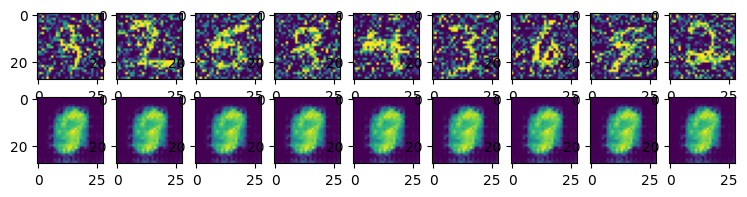

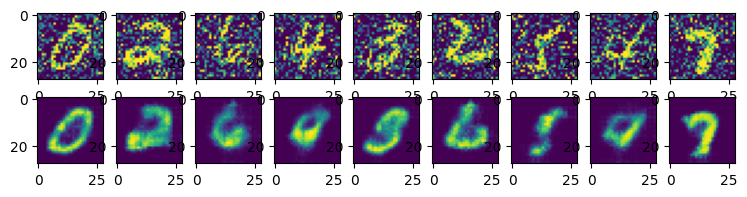

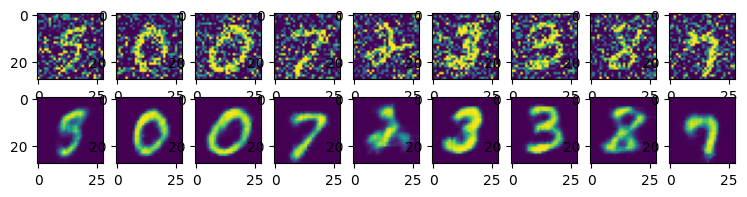

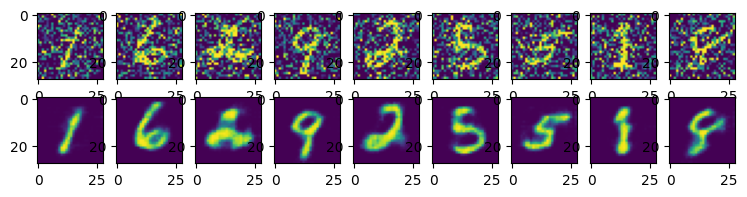

In [26]:
# reconstructed images at various parts of training
for k in range(0, max_epochs, 5):
    plt.figure(figsize=(9, 2))
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()
    for i, item in enumerate(imgs):
        if i >= 9: break
        plt.subplot(2, 9, i+1)
        plt.imshow(item[0])

    for i, item in enumerate(recon):
        if i >= 9: break
        plt.subplot(2, 9, 9+i+1)
        plt.imshow(item[0])

In [27]:
# testing on new images
from torch.utils.data import Dataset, IterableDataset, DataLoader
from torchvision import datasets, transforms
import torch
batch_size = 64

mnist_data = datasets.MNIST('data', train=False, download=True, transform=transforms.ToTensor())
print(type(mnist_data))
mnist_data = list(mnist_data)[4096:4160]  # convert to list for easier indexing
type(mnist_data) , print(mnist_data.__len__())

<class 'torchvision.datasets.mnist.MNIST'>
64


(list, None)

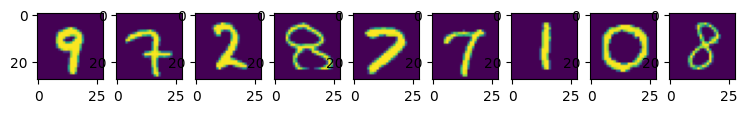

In [28]:
test_loader = torch.utils.data.DataLoader(mnist_data, batch_size=batch_size, shuffle=True)

for data in test_loader:
    img, _ = data  # we only need the images, not the labels
    recon = model(img) # forward pass with new test images
    plt.figure(figsize=(9, 2))
    for i, item in enumerate(img):
            if i >= 9: break
            plt.subplot(2, 9, i+1)
            plt.imshow(item[0]) # display the original test images
    break  # just test on the first batch of test images

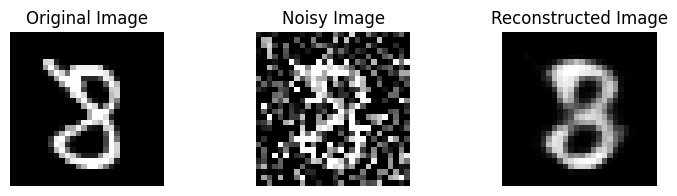

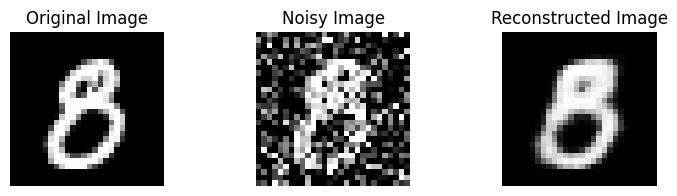

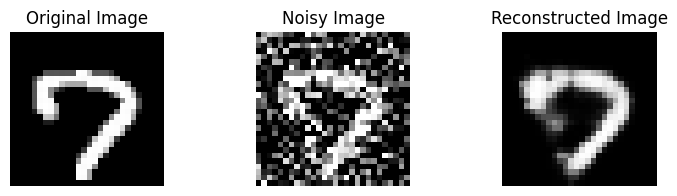

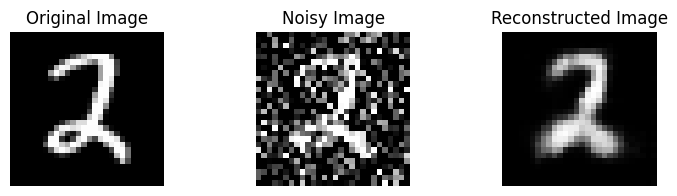

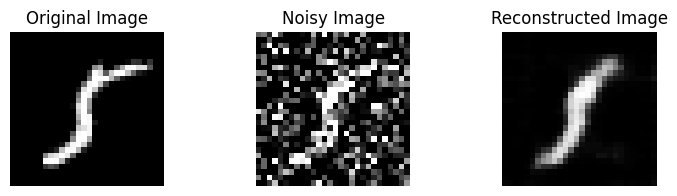

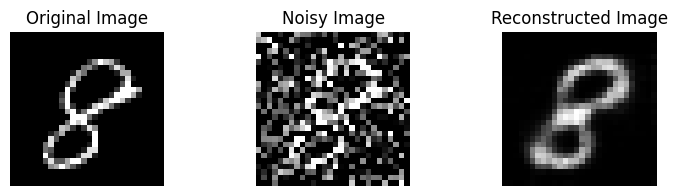

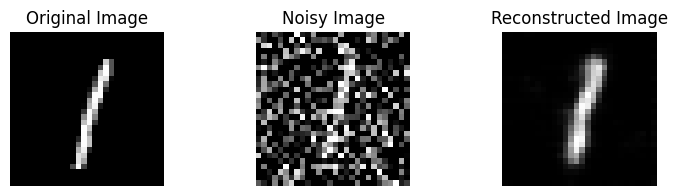

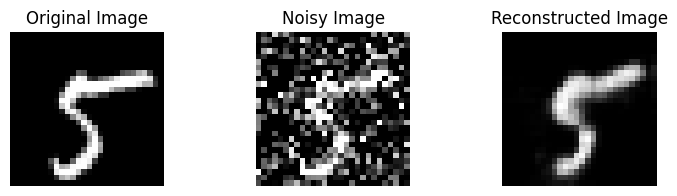

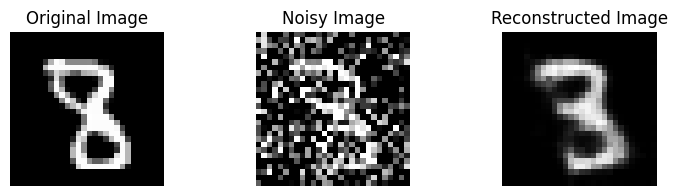

In [29]:
# obtain one batch of test images

dataiter = iter(test_loader)
images, labels = next(dataiter)  # get the first batch of images and labels

# add noise to the test images
noise = 0.5
images_noisy = images + noise * torch.randn(*images.shape)  # add Gaussian noise
images_noisy = torch.clamp(images_noisy, 0., 1.)  # ensure the noisy images are still in the valid range [0, 1] 

# get sample outputs

recon = model(images_noisy)  # get the reconstructed images from the model

# prep images for plotting
images_noisy = images_noisy.detach().numpy()
recon = recon.detach().numpy()

# plot the original, noisy, and reconstructed images
for k in range(0, 9):
    plt.figure(figsize=(9, 2))
    
    # plot the original image
    plt.subplot(1, 3, 1)
    plt.imshow(images[k][0], cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # plot the noisy image
    plt.subplot(1, 3, 2)
    plt.imshow(images_noisy[k][0], cmap='gray')
    plt.title('Noisy Image')
    plt.axis('off')

    # plot the reconstructed image
    plt.subplot(1, 3, 3)
    plt.imshow(recon[k][0], cmap='gray')
    plt.title('Reconstructed Image')
    plt.axis('off')

    plt.show()

## Structure in the Embeddings 

the network should be able to save space by mapping similar images to similar embeddings

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

from torchvision import datasets, transforms
from torch.utils.data import DataLoader

mnist_data = datasets.MNIST('data', train=False, download=True, transform=transforms.ToTensor())
mnist_data = list(mnist_data)[4096:4160]  # convert to list for easier indexing


class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        
        encoding_dim = 32

        # encoder
        self.fc1 = nn.Linear(28*28, encoding_dim)
        # decoder
        self.fc2 = nn.Linear(encoding_dim, 28*28)

    def forward(self, x):
        # flatten the input
        x = x.view(x.size(0), -1)   # reshape to (batch_size, 28*28) good for batch processing
        
        # encode
        encoded = F.relu(self.fc1(x))
        # decode
        decoded = torch.sigmoid(self.fc2(encoded))
        return decoded